In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

%matplotlib inline 

## Part 1

Generating samples from using the linear model:

$y = 2 x_1 + 3 x_2 + \epsilon$



In [15]:
X_1 = 4 * np.random.uniform(-4, 4, 400)
X_2 = 4 * np.random.uniform(-4, 4, 400)

epsilon = np.random.normal(0, np.sqrt(0.01))


Generating $y$ values

In [16]:
Y = 2*X_1 + 3*X_2 + 1

Consider a linear regresion model without bias of the form


$\hat{y} = a x_1 + b x_2 $

The squared error loss will become:

$J = (\hat{y} - y)^2 = (a x_1 + b x_2 - y)^2 = [(a-2)x_1 + (b-3)x_2 - \epsilon]^2$



## Part 2

Plotting the error curve with respect to the parameters of this problem (100 values)

We first calculate error values for different combinations of a,b

In [55]:
A = np.linspace(-50, 50, 100)
B = np.linspace(-50, 50, 100)

A, B = np.meshgrid(A, B)

Z = np.zeros((100, 100))

for x_1, x_2 in zip(X_1, X_2):
    Z += ((A - 2)*x_1 + (B - 3)*x_2 - epsilon)**2


Plotting the error surface

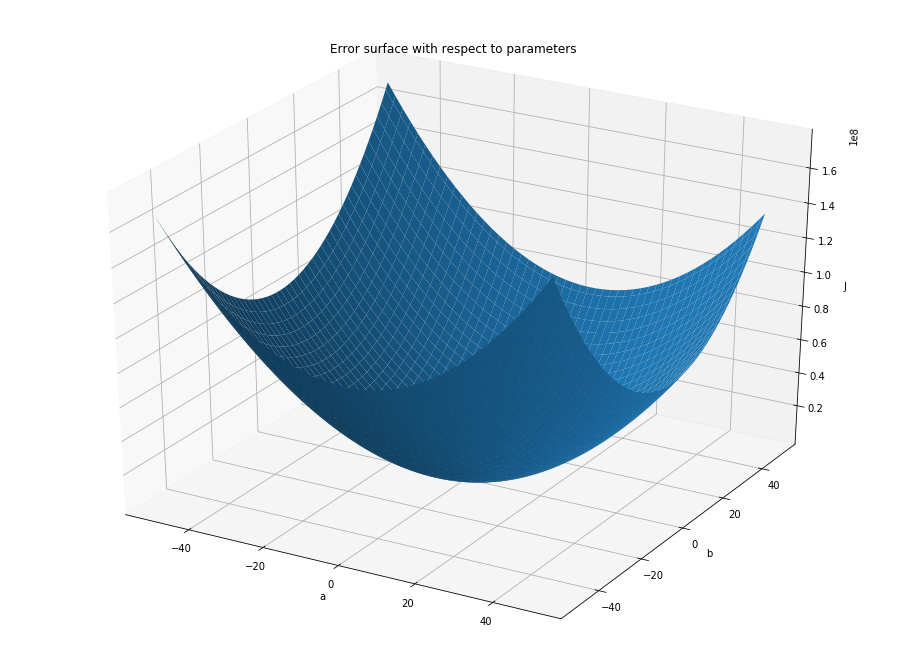

In [56]:
fig = plt.figure(figsize=(16, 12))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(A, B, Z)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('J')
ax.set_title('Error surface with respect to parameters')
plt.show()

## Part 3

Gradient descent with constant step size for a and b:

Update for a is:

$a' = a - \eta \nabla_{a} J(x_1, x_2)$

where

$\nabla_{a} J(x_1, x_2) = 2x_1[(a-2)x_1 + (b-3)x_2 -\epsilon]$

Update for b is:

$b' = b - \eta \nabla_{b} J(x_1, x_2)$

where

$\nabla_{b} J(x_1, x_2) = 2x_2[(a-2)x_1 + (b-3)x_2 -\epsilon]$



### Optimal learning rate

The optimal learning rate $\eta_{opt}$ is found using the backtracking line search algorithm:

First, fix a parameter $0 < \beta < 1$, then at each iteration, start with $\eta = 1$, and while

$J(x − \nabla J(x)) > J(x) −\frac{\eta}{2} |\nabla J(x)|^2$


update $\eta = \beta \eta$,

In [117]:
def calc_grad(a, b, x_1, x_2, epsilon, eta):
    d_J_a = 2 * x_1 * ((a-2)*x_1 + (b-3)*x_2 - epsilon)
    d_J_b = 2 * x_2 * ((a-2)*x_1 + (b-3)*x_2 - epsilon)

    a_1 = a - eta * d_J_a
    b_1 = b - eta * d_J_b

    J_old = ((a - 2)*x_1 + (b - 3)*x_2 - epsilon)**2

    J_new = ((a_1 - 2)*x_1 + (b_1 - 3)*x_2 - epsilon)**2

    norm_J_old = d_J_a**2 + d_J_b**2
    
    return J_old, J_new, norm_J_old, a_1, b_1


def backtrack_line_search(a, b, x_1, x_2, epsilon, verbose=True):
    eta = 1
    beta = 0.8
    
    J_old, J_new, norm_J_old, _, _ = calc_grad(a, b, x_1, x_2, epsilon, eta)
    
    while J_new > J_old - 1/2 * eta * norm_J_old :
        eta = eta * beta
        J_old, J_new, norm_J_old, _, _ = calc_grad(a, b, x_1, x_2, epsilon, eta)
        if verbose:
            print(eta)
    return eta
   

In [51]:
a, b = np.random.randint(-4, 4, 2)

In [52]:
a, b

(-4, -2)

In [53]:
x_1, x_2 = X_1[0], X_2[0]
x_1, x_2

(1.9582504987446683, 6.866007046493742)

In [54]:
eta_opt = backtrack_line_search(a, b, x_1, x_2, epsilon) # For first sample

print("\nTherefore optimal step size for the first sample is given as:", eta_opt)

0.8
0.6400000000000001
0.5120000000000001
0.40960000000000013
0.32768000000000014
0.2621440000000001
0.2097152000000001
0.1677721600000001
0.13421772800000006
0.10737418240000006
0.08589934592000005
0.06871947673600004
0.054975581388800036
0.043980465111040035
0.03518437208883203
0.028147497671065627
0.022517998136852502
0.018014398509482003
0.014411518807585602
0.011529215046068483
0.009223372036854787

Therefore optimal step size for the first sample is given as: 0.009223372036854787


## Part 4

Gradient descent for all 400 samples using different step sizes:


In [187]:
def gradient_descent(X_1, X_2, epsilon, multiplier=1, max_epochs=1000):
    counter = 0
    convergence = True
    
    a, b = 0.5, 1.5
    J = np.sum(((a - 2)*X_1 + (b - 3)*X_2 - epsilon)**2)
    delta_J = J
    
    errors = []
    while delta_J > 0.001:
        d_a, d_b = 0, 0
        
        for x_1, x_2 in zip(X_1, X_2):
            eta_opt = backtrack_line_search(a, b, x_1, x_2, epsilon, verbose=False)
            
            eta = multiplier*eta_opt

            d_J_a = 2 * x_1 * ((a-2)*x_1 + (b-3)*x_2 - epsilon)
            d_J_b = 2 * x_2 * ((a-2)*x_1 + (b-3)*x_2 - epsilon)

            d_a += eta * d_J_a
            d_b += eta * d_J_b
        
        a -= d_a / X_1.shape[0]
        b -= d_b / X_1.shape[0]
        
        J_new = np.sum(((a - 2)*X_1 + (b - 3)*X_2 - epsilon)**2)        
        delta_J = J - J_new
        
        J = J_new
        
        errors.append((J, a, b))
        counter += 1
        
        if counter > max_epochs:
            convergence = False
            break
        
        print("Epoch {} - Error:{}, a:{}, b:{}".format(counter, J, a, b))
    
    return convergence, errors
    
    

In [200]:
def create_contour_plot(errors):
    A = np.linspace(-1, 3, 100)
    B = np.linspace(1, 4, 100)

    A, B = np.meshgrid(A, B)

    Z = np.zeros((100, 100))

    for x_1, x_2 in zip(X_1, X_2):
        Z += ((A - 2)*x_1 + (B - 3)*x_2 - epsilon)**2
    
    a, b = [x[1] for x in errors], [x[2] for x in errors]
    a = [0.5] + a
    b = [1.5] + b
    fig = plt.figure(figsize=(16, 12))
    ax = fig.gca()

    ax.contourf(A, B, Z)
    ax.plot(a, b)
    ax.scatter(a, b)
    ax.set_xlabel('a')
    ax.set_ylabel('b')
    ax.set_title('Error Contours and GD updates')
    plt.show()
    
    

In [201]:
def error_curve(errors):
    error = [x[0] for x in errors]
    fig = plt.figure(figsize=(16, 12))
    ax = fig.gca()
    ax.plot(error)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Error')
    ax.set_title('Error vs Epoch curve')
    plt.show()


### Gradient descent with $\eta = \frac{0.9}{2} \eta_{opt}$

In [202]:
convergence, errors = gradient_descent(X_1, X_2, epsilon, 0.9/2)

Epoch 1 - Error:89584.3097720723, a:0.7646174359707023, b:1.800309687335801
Epoch 2 - Error:59049.29026247752, a:0.9830132419035238, b:2.0400251057049488
Epoch 3 - Error:38956.20919570151, a:1.1631565217353397, b:2.2314646744598807
Epoch 4 - Error:25721.39247761429, a:1.3116664694304303, b:2.3844242140972653
Epoch 5 - Error:16995.9724780872, a:1.434035431737417, b:2.5066971551779456
Epoch 6 - Error:11238.566604553476, a:1.5348164398676902, b:2.604486759186842
Epoch 7 - Error:7436.53475283087, a:1.6177805468537256, b:2.6827329065912053
Epoch 8 - Error:4923.892501385852, a:1.6860485871851814, b:2.7453712694930146
Epoch 9 - Error:3262.200446763176, a:1.742201330568692, b:2.7955389487756896
Epoch 10 - Error:2162.5470759946616, a:1.7883714308981822, b:2.835737706311066
Epoch 11 - Error:1434.3845109067809, a:1.8263200708814413, b:2.867963594616175
Epoch 12 - Error:951.9353123025941, a:1.8575007669579244, b:2.8938099478653627
Epoch 13 - Error:632.1116697473685, a:1.8831124221857867, b:2.91454

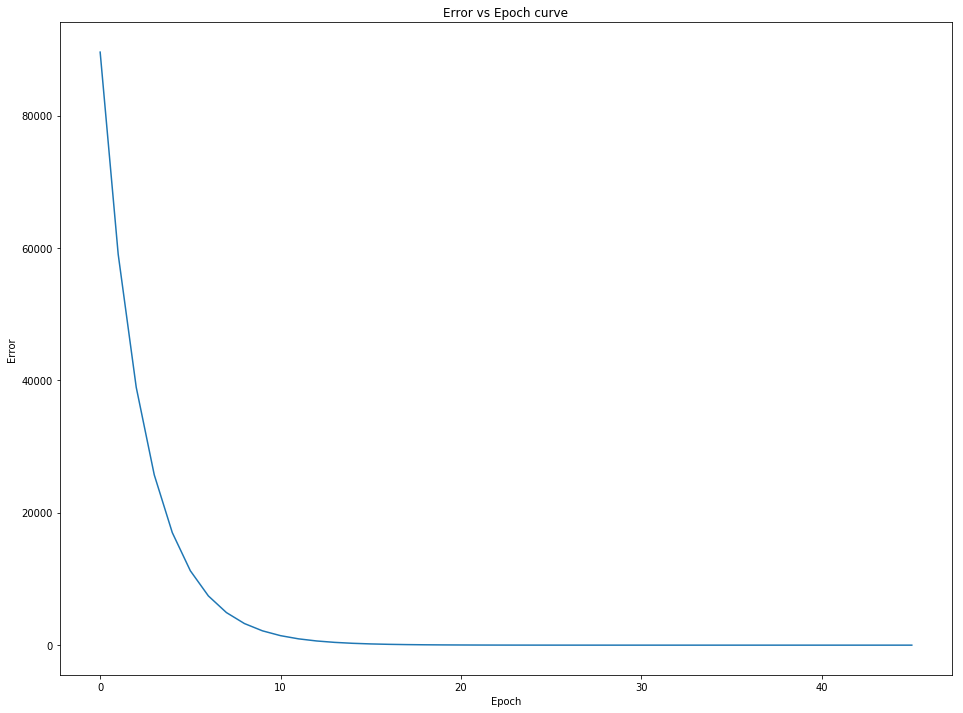

In [203]:
error_curve(errors)

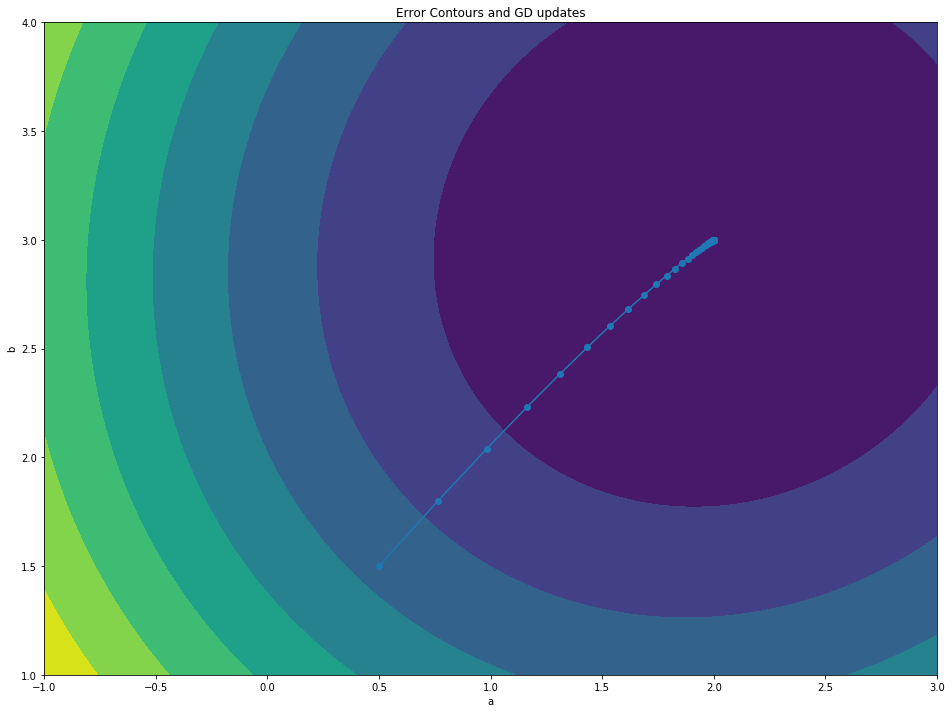

In [204]:
create_contour_plot(errors)

### Gradient descent with $\eta = \frac{1.5}{2} \eta_{opt}$

In [205]:
convergence, errors = gradient_descent(X_1, X_2, epsilon, 1.5/2)

Epoch 1 - Error:64017.53773133937, a:0.9410290599511701, b:2.000516145559669
Epoch 2 - Error:30231.698363283984, a:1.25366470313045, b:2.3327148773230775
Epoch 3 - Error:14320.453514595385, a:1.474800929245593, b:2.5536259145144773
Epoch 4 - Error:6801.6962039756045, a:1.6309157659935951, b:2.70081447901421
Epoch 5 - Error:3238.21830165744, a:1.7409398744739542, b:2.799071224884771
Epoch 6 - Error:1544.9632728897636, a:1.8183636002786416, b:2.864787608996708
Epoch 7 - Error:738.5701507358617, a:1.8727731123482911, b:2.9088224318638565
Epoch 8 - Error:353.7786083896196, a:1.9109633951869238, b:2.938383197690347
Epoch 9 - Error:169.84566192677795, a:1.9377404662462145, b:2.958263127971755
Epoch 10 - Error:81.78665277754921, a:1.9564970451002255, b:2.971656018849885
Epoch 11 - Error:39.56658621473723, a:1.969624092465617, b:2.9806940231957304
Epoch 12 - Error:19.29563622750478, a:1.9788040560473321, b:2.986803248234289
Epoch 13 - Error:9.549062904990453, a:1.9852192342720496, b:2.99093933

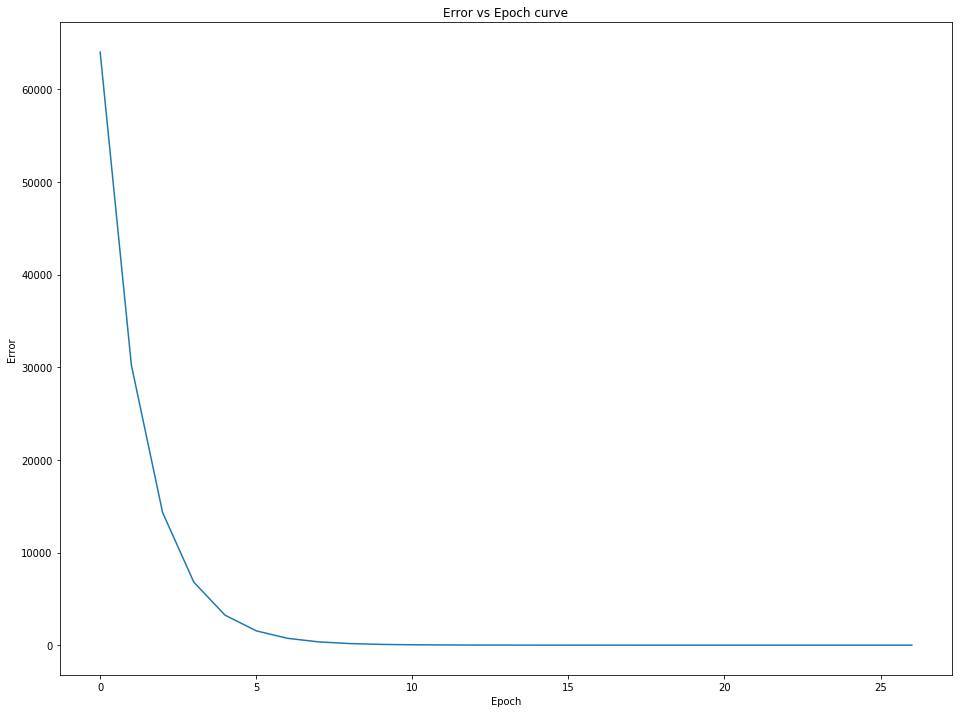

In [206]:
error_curve(errors)

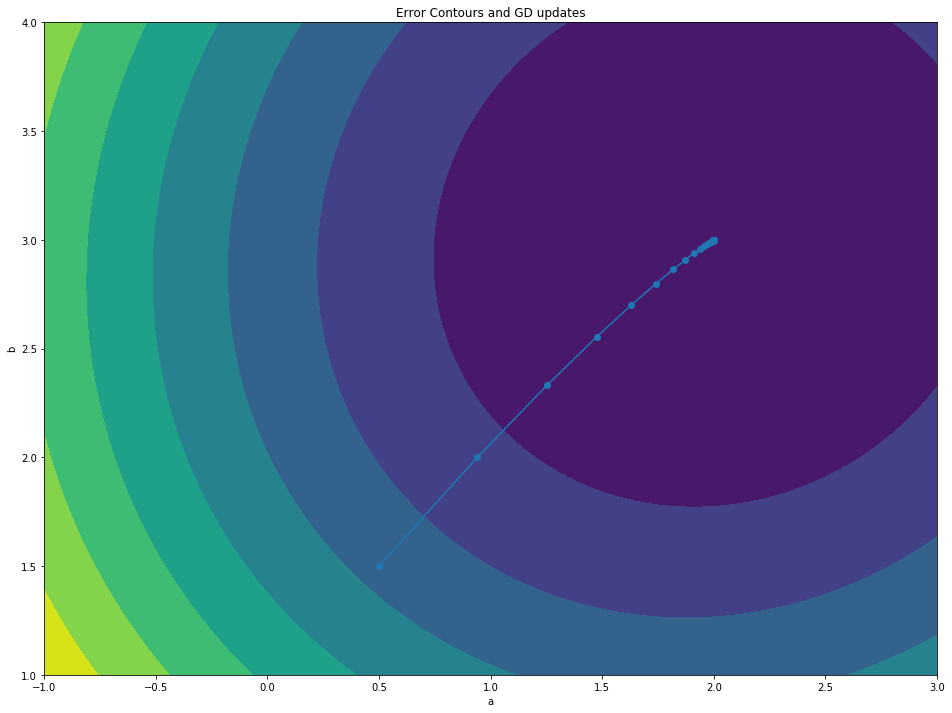

In [207]:
create_contour_plot(errors)

### Gradient descent with $\eta = \eta_{opt}$

In [208]:
convergence, errors = gradient_descent(X_1, X_2, epsilon, 1)

Epoch 1 - Error:46012.45175553721, a:1.088038746601561, b:2.167354860746225
Epoch 2 - Error:15692.692335213342, a:1.4478225300530934, b:2.5354787636324323
Epoch 3 - Error:5387.816183187928, a:1.666803794106311, b:2.7395532653383277
Epoch 4 - Error:1859.8132946454607, a:1.7995153672690487, b:2.853242498839411
Epoch 5 - Error:644.922876572851, a:1.8796587424068252, b:2.916884481368656
Epoch 6 - Error:224.62799449949108, a:1.9279134448105177, b:2.952677712837619
Epoch 7 - Error:78.67991945575014, a:1.9568956917455036, b:2.972899217314198
Epoch 8 - Error:27.838332596135913, a:1.9742662651197198, b:2.9843725605997458
Epoch 9 - Error:10.075867657018078, a:1.9846588945476202, b:2.99090880389791
Epoch 10 - Error:3.8514656393172113, a:1.9908673232223606, b:2.9946466208513454
Epoch 11 - Error:1.6624188643283921, a:1.9945713968639596, b:2.9967917058514506
Epoch 12 - Error:0.888820945012151, a:1.9967788951668735, b:2.998026773136533
Epoch 13 - Error:0.6135026679836153, a:1.9980932495361825, b:2.99

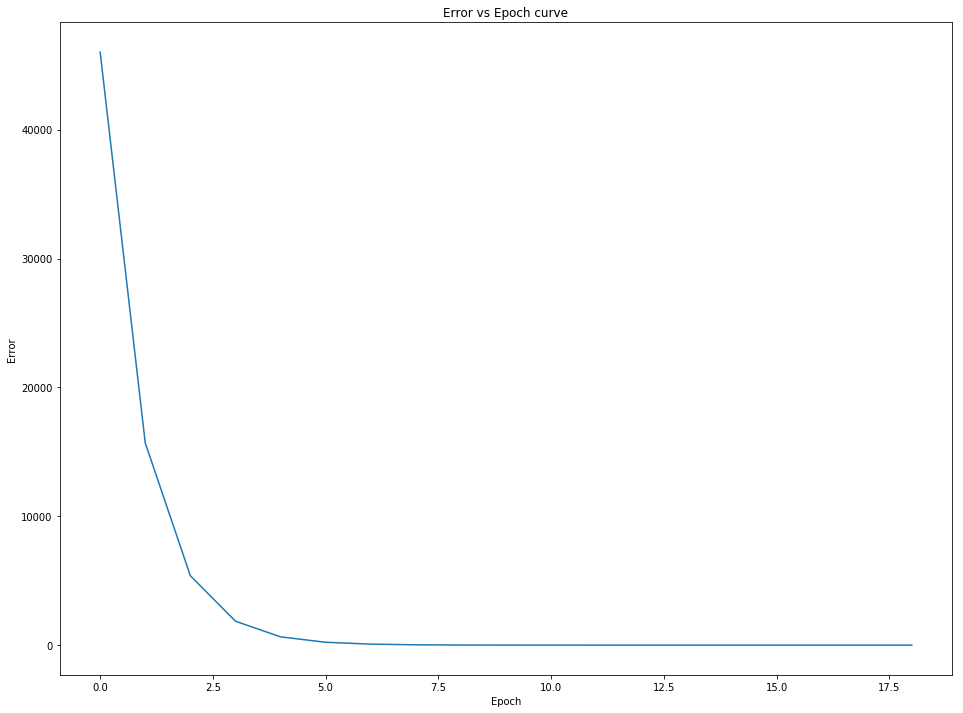

In [209]:
error_curve(errors)

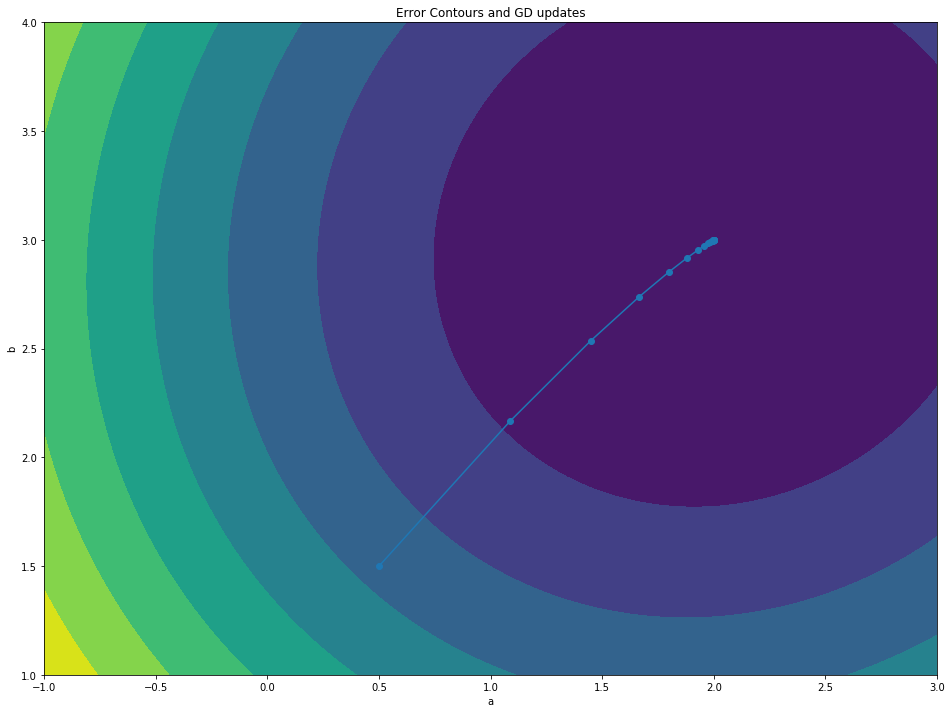

In [210]:
create_contour_plot(errors)

### Gradient descent with $\eta = 1.5\eta_{opt}$

In [211]:
convergence, errors = gradient_descent(X_1, X_2, epsilon, 1.5)

Epoch 1 - Error:19003.799962502002, a:1.3820581199023403, b:2.501032291119338
Epoch 2 - Error:2757.522217232435, a:1.750542572717119, b:2.8287949270536337
Epoch 3 - Error:408.65535019204424, a:1.9006053561063654, b:2.939525661596902
Epoch 4 - Error:61.592165995858124, a:1.9607429155599796, b:2.9780302910405947
Epoch 5 - Error:9.696884252922004, a:1.984591517620086, b:2.9917603990076556
Epoch 6 - Error:1.871274404092458, a:1.9939831464147222, b:2.9967593316759
Epoch 7 - Error:0.6785360223160168, a:1.9976641109584516, b:2.9986097294075185
Epoch 8 - Error:0.49287228969034297, a:1.9991021673947988, b:2.9993034333902684
Epoch 9 - Error:0.4625899194116274, a:1.9996627276074506, b:2.9995659873558864
Epoch 10 - Error:0.4571472986786869, a:1.9998808997696478, b:2.999666056631134
Epoch 11 - Error:0.45599163529946096, a:1.9999657224848026, b:2.9997043905139904
Epoch 12 - Error:0.45568906215442695, a:1.9999986760405706, b:2.999719128614806


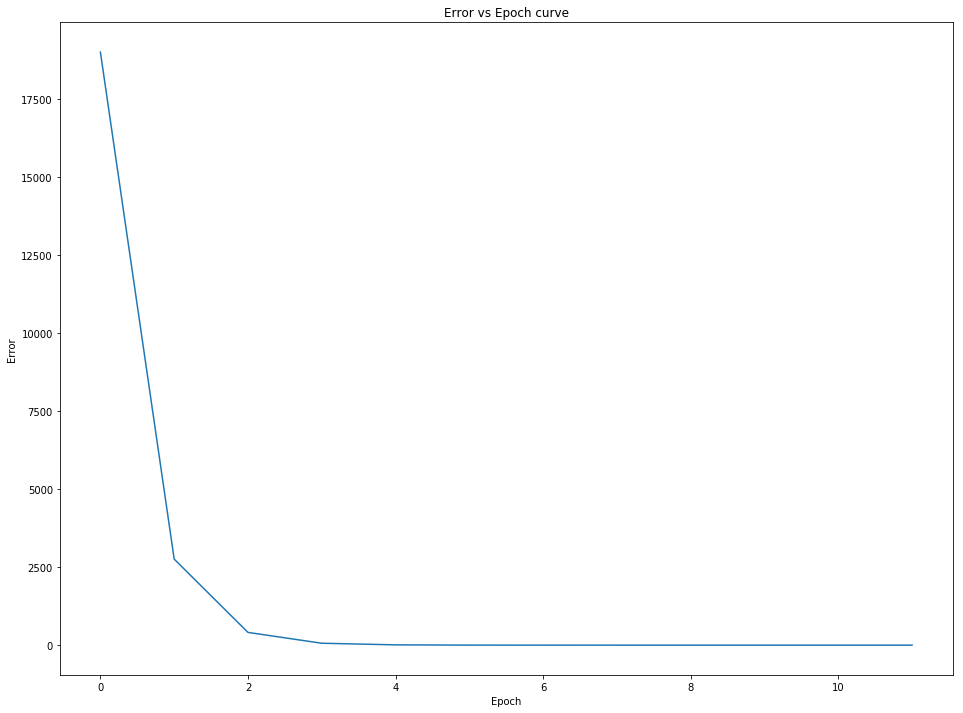

In [212]:
error_curve(errors)

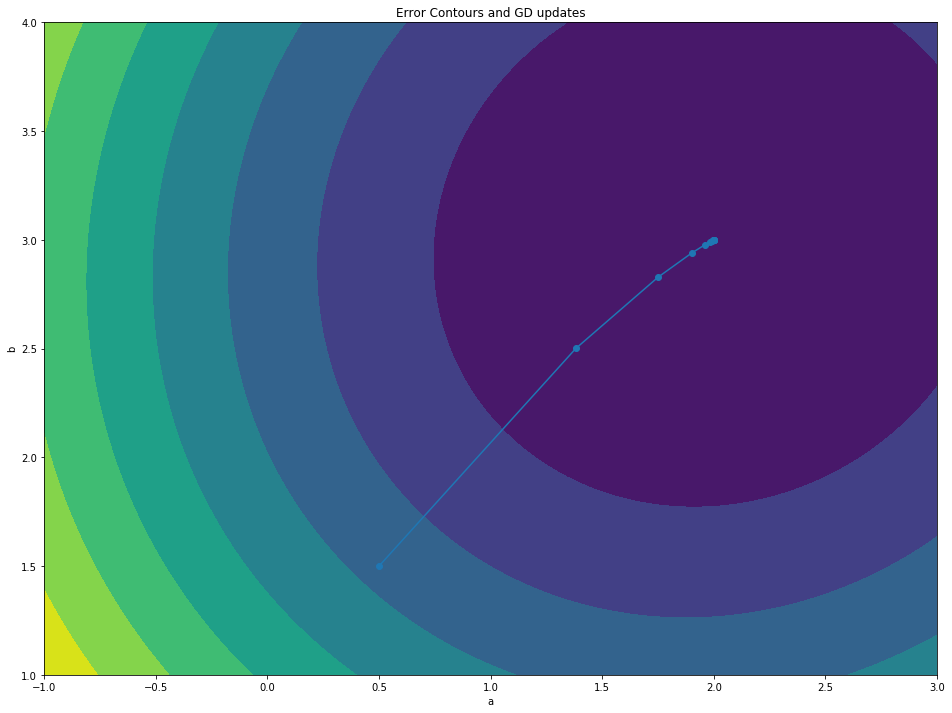

In [213]:
create_contour_plot(errors)